In [2]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV and Perform Basic Data Cleaning

Create a Random Sample Dataframe to get random an equal number of random values for white wine data
Red wine data has 1599 rows, and White wine data has 4898 rows

In [5]:
red_wine_df = pd.read_csv("winequality-red.csv", sep=';')
white_df = pd.read_csv("winequality-white.csv", sep=';')
white_wine_df = white_df.copy()
red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


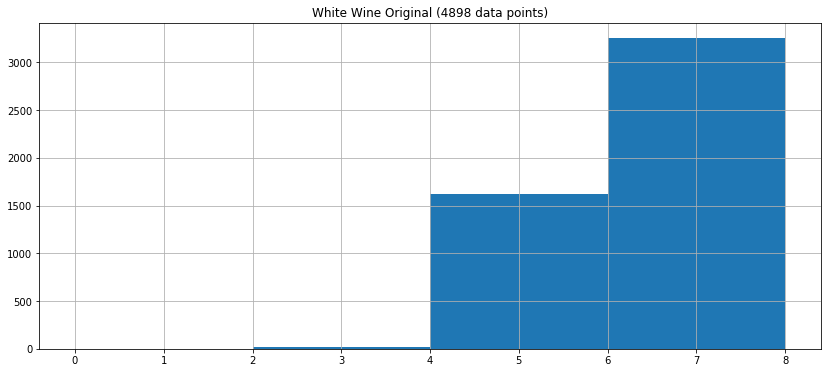

In [18]:
bin_values = np.arange(start=0, stop=10, step=2)
white_df['quality'].hist(bins=bin_values, figsize=[14,6])
plt.title("White Wine Original (4898 data points)")
plt.show()

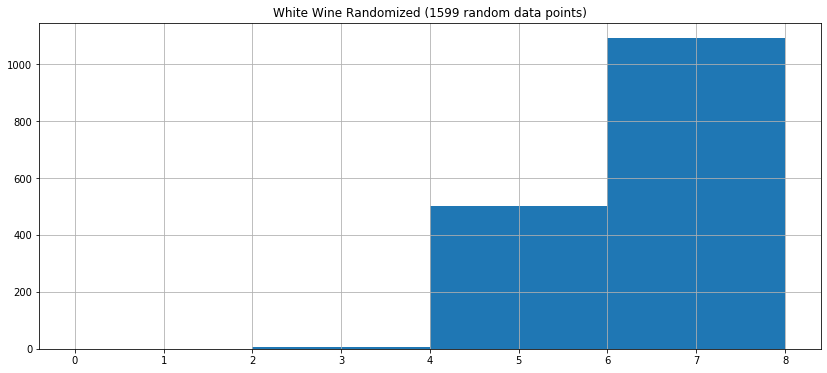

In [16]:
bin_values = np.arange(start=0, stop=9, step=2)
rand_white_df['quality'].hist(bins=bin_values, figsize=[14,6])
plt.title("White Wine Randomized (1599 random data points)")
plt.show()

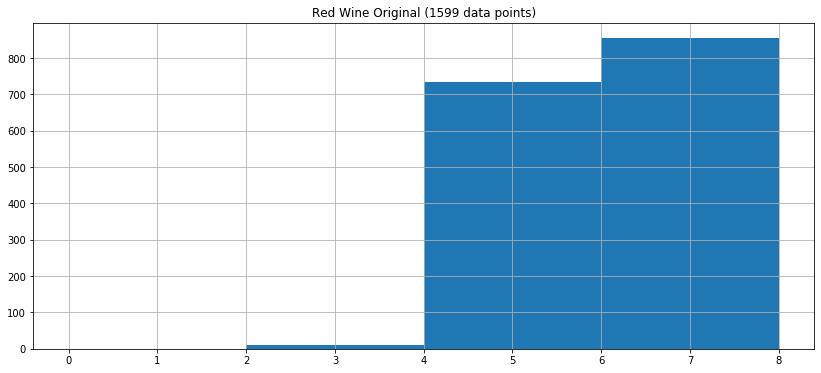

In [17]:
bin_values = np.arange(start=0, stop=9, step=2)
red_wine_df['quality'].hist(bins=bin_values, figsize=[14,6])
plt.title("Red Wine Original (1599 data points)")
plt.show()

In [11]:
#Remove quality of 9's, because only white wine data has five 9 qualities which would skew our data
new_white_df = white_wine_df[white_wine_df["quality"] <= 8].copy()
#get random sample
rand_white_df = new_white_df.sample(1599,random_state=54).reset_index(drop=True)
rand_white_df
#add color rows
rand_white_df["color"] = "white"
red_wine_df["color"] = "red"
# rand_white_df
# red_wine_df
new_combinedf = pd.concat([red_wine_df, rand_white_df,])
#red wine is 0 and white wine is 1
combinedf = pd.get_dummies(new_combinedf, columns=['color'])
combinedf = combinedf.drop(columns=["color_red"]).copy()
# combinedf = next_combinedf.copy()
combinedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_white
0,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,5.2,0.37,0.33,1.20,0.028,13.0,81.0,0.99020,3.37,0.38,11.7,6,1
1595,6.8,0.25,0.18,1.40,0.056,13.0,137.0,0.99350,3.11,0.42,9.5,5,1
1596,6.4,0.40,0.25,4.20,0.032,15.0,91.0,0.98988,3.26,0.52,13.1,6,1
1597,7.8,0.21,0.49,1.35,0.052,6.0,48.0,0.99110,3.15,0.28,11.4,5,1


In [9]:
combinedf = combinedf.loc[\
(combinedf["quality"] < 9 ) & \
(combinedf["quality"] > 3 )  \
] 
combinedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_white
0,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,5.2,0.37,0.33,1.20,0.028,13.0,81.0,0.99020,3.37,0.38,11.7,6,1
1595,6.8,0.25,0.18,1.40,0.056,13.0,137.0,0.99350,3.11,0.42,9.5,5,1
1596,6.4,0.40,0.25,4.20,0.032,15.0,91.0,0.98988,3.26,0.52,13.1,6,1
1597,7.8,0.21,0.49,1.35,0.052,6.0,48.0,0.99110,3.15,0.28,11.4,5,1


In [234]:
# df1 = pd.read_csv("winequality-white.csv", sep=';')
# df2 = pd.read_csv("winequality-red.csv", sep=';')
# combinedf = pd.concat([df1,df2])
# combinedf = combinedf.dropna(axis='columns', how='all')
# # Drop the null rows
# combinedf = combinedf.dropna()
# combinedf.head()

In [252]:
combinedf.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
4,109,109,109,109,109,109,109,109,109,109,109
5,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133
6,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347
7,513,513,513,513,513,513,513,513,513,513,513
8,81,81,81,81,81,81,81,81,81,81,81


# Select your features (columns)

In [253]:
# Set features. Drop quality disposition, y value. 
X = combinedf.drop(columns='quality')
#X = df.drop(columns='quality')
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Create a Train Test Split

Use `quality` for the y values

In [254]:
from sklearn.model_selection import train_test_split
#80% train, 20% test. y is this one column
#y = df['quality']
y = combinedf['quality']
#random state 42 will have same picks for x test and y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [255]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
755,7.8,0.91,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7
1409,6.0,0.51,0.00,2.1,0.064,40.0,54.0,0.99500,3.54,0.93,10.7
494,6.2,0.38,0.42,2.5,0.038,34.0,117.0,0.99132,3.36,0.59,11.6
694,9.0,0.47,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,0.61,9.4
601,13.2,0.46,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0


# Pre-processing

Scale the data using LabelEncoder and MinMaxScaler

In [256]:
# Scale your data - see Activity 03/05
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 

In [257]:
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

In [258]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [259]:
y_train_categorical.shape

(2546, 5)

# Train the Model

In [260]:
# first, create a normal neural network with 11 inputs, 100 hidden nodes, and 3 outputs
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=11))
model.add(Dense(units=100, activation='relu'))
#model.add(Dense(units=10000, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [261]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [262]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_68 (Dense)             (None, 1000)              101000    
_________________________________________________________________
dense_69 (Dense)             (None, 10000)             10010000  
_________________________________________________________________
dense_70 (Dense)             (None, 5)                 50005     
Total params: 10,162,205
Trainable params: 10,162,205
Non-trainable params: 0
_________________________________________________________________


In [263]:
# set early stopping as callback
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]
model.fit(
    X_train_scaled,
    y_train_categorical,
    callbacks=callbacks,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
 - 8s - loss: 1.1122 - accuracy: 0.5220
Epoch 2/60


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 8s - loss: 1.0405 - accuracy: 0.5412
Epoch 3/60
 - 8s - loss: 1.0156 - accuracy: 0.5723
Epoch 4/60
 - 9s - loss: 1.0035 - accuracy: 0.5723
Epoch 5/60
 - 8s - loss: 0.9829 - accuracy: 0.5872
Epoch 6/60
 - 8s - loss: 0.9708 - accuracy: 0.5786
Epoch 7/60
 - 8s - loss: 0.9664 - accuracy: 0.5829
Epoch 8/60
 - 8s - loss: 0.9545 - accuracy: 0.5919
Epoch 9/60
 - 8s - loss: 0.9555 - accuracy: 0.5903
Epoch 10/60
 - 8s - loss: 0.9374 - accuracy: 0.5962
Epoch 11/60
 - 8s - loss: 0.9326 - accuracy: 0.5927
Epoch 12/60
 - 8s - loss: 0.9112 - accuracy: 0.6147
Epoch 13/60
 - 8s - loss: 0.9047 - accuracy: 0.6147
Epoch 14/60
 - 8s - loss: 0.9060 - accuracy: 0.6076
Epoch 15/60
 - 8s - loss: 0.8848 - accuracy: 0.6151
Epoch 16/60
 - 8s - loss: 0.8814 - accuracy: 0.6167
Epoch 17/60
 - 8s - loss: 0.8691 - accuracy: 0.6214
Epoch 18/60
 - 8s - loss: 0.8572 - accuracy: 0.6119
Epoch 19/60
 - 7s - loss: 0.8523 - accuracy: 0.6261
Epoch 20/60
 - 7s - loss: 0.8404 - accuracy: 0.6214
Epoch 21/60
 - 7s - loss: 0.839

In [264]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 2.3819142976772842, Accuracy: 0.5368916988372803


In [265]:
encoded_predictions = model.predict_classes(X_test_scaled[:20])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [249]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:20])}")

Predicted classes: [6 5 6 6 5 6 6 7 5 6 6 6 7 6 7 6 6 6 6 6]
Actual Labels: [6, 7, 5, 6, 5, 5, 6, 7, 5, 6, 8, 7, 7, 5, 7, 7, 5, 6, 6, 6]


# RESULTS

quality = 5,6,7

test size = .1

model.add(Dense(units=100, activation='relu', input_dim=11))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

Normal Neural Network - Loss: 0.816428262801847, Accuracy: 0.6056105494499207

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
# import joblib
# filename = 'redwinedeeplearning.sav'
# joblib.dump(model, filename)